In [55]:
# import warnings
# warnings.filterwarnings("ignore")

In [56]:
!pip install yfinance

In [57]:
!pip install pandas_market_calendars

In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as datetime
import pandas_market_calendars as pmcal
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

In [59]:
# ticker = input("Enter the strock symbol:")
stock_ticker = yf.Ticker("SBUX")
start_date = datetime.date(2018,1,1)
end_date = datetime.date.today()
data = stock_ticker.history(start = start_date, end = end_date)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0
2018-01-03 00:00:00-05:00,50.252991,51.146492,50.140218,50.929623,7478400,0.0,0.0
2018-01-04 00:00:00-05:00,51.172518,51.536857,50.946972,51.120468,5775900,0.0,0.0
2018-01-05 00:00:00-05:00,51.398065,51.779754,51.241919,51.710358,6047700,0.0,0.0
2018-01-08 00:00:00-05:00,51.597585,51.762404,50.799507,51.450115,6335800,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-07 00:00:00-05:00,96.059998,96.690002,95.760002,96.120003,6195200,0.0,0.0
2024-11-08 00:00:00-05:00,96.110001,97.639999,96.029999,97.550003,6118700,0.0,0.0
2024-11-11 00:00:00-05:00,98.000000,101.410004,97.949997,100.309998,10313300,0.0,0.0


In [60]:
data.index = data.index.date

In [61]:
data = data.reset_index(drop = False)
data.rename(columns={'index': 'Dates'}, inplace=True)  # Optional: rename column to "row_index"
type(pd.to_datetime(data["Dates"]))
data

,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0
1,2018-01-03,50.252991,51.146492,50.140218,50.929623,7478400,0.0,0.0
2,2018-01-04,51.172518,51.536857,50.946972,51.120468,5775900,0.0,0.0
3,2018-01-05,51.398065,51.779754,51.241919,51.710358,6047700,0.0,0.0
4,2018-01-08,51.597585,51.762404,50.799507,51.450115,6335800,0.0,0.0
...,...,...,...,...,...,...,...,...
1724,2024-11-07,96.059998,96.690002,95.760002,96.120003,6195200,0.0,0.0
1725,2024-11-08,96.110001,97.639999,96.029999,97.550003,6118700,0.0,0.0
1726,2024-11-11,98.000000,101.410004,97.949997,100.309998,10313300,0.0,0.0
1727,2024-11-12,100.129997,100.540001,98.419998,98.800003,8438400,0.0,0.0


In [62]:
data["Dates"] = pd.to_datetime(data["Dates"])
data.set_index(data["Dates"], inplace = True)  # Set the copied column as the index
data

,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits
Dates,,,,,,,,
2018-01-02,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0
2018-01-03,2018-01-03,50.252991,51.146492,50.140218,50.929623,7478400,0.0,0.0
2018-01-04,2018-01-04,51.172518,51.536857,50.946972,51.120468,5775900,0.0,0.0
2018-01-05,2018-01-05,51.398065,51.779754,51.241919,51.710358,6047700,0.0,0.0
2018-01-08,2018-01-08,51.597585,51.762404,50.799507,51.450115,6335800,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-11-07,2024-11-07,96.059998,96.690002,95.760002,96.120003,6195200,0.0,0.0
2024-11-08,2024-11-08,96.110001,97.639999,96.029999,97.550003,6118700,0.0,0.0
2024-11-11,2024-11-11,98.000000,101.410004,97.949997,100.309998,10313300,0.0,0.0


In [63]:
data.head()

,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits
Dates,,,,,,,,
2018-01-02,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0
2018-01-03,2018-01-03,50.252991,51.146492,50.140218,50.929623,7478400,0.0,0.0
2018-01-04,2018-01-04,51.172518,51.536857,50.946972,51.120468,5775900,0.0,0.0
2018-01-05,2018-01-05,51.398065,51.779754,51.241919,51.710358,6047700,0.0,0.0
2018-01-08,2018-01-08,51.597585,51.762404,50.799507,51.450115,6335800,0.0,0.0


#Task - 1

In [64]:
data["Close"]

,Close
Dates,
2018-01-02,49.992756
2018-01-03,50.929623
2018-01-04,51.120468
2018-01-05,51.710358
2018-01-08,51.450115
...,...
2024-11-07,96.120003
2024-11-08,97.550003
2024-11-11,100.309998


In [65]:
scaler = MinMaxScaler(feature_range = (0,1))
data["Scaled_close"] = scaler.fit_transform(pd.DataFrame(data["Close"]))
data

,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,Scaled_close
Dates,,,,,,,,,
2018-01-02,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0,0.099481
2018-01-03,2018-01-03,50.252991,51.146492,50.140218,50.929623,7478400,0.0,0.0,0.112015
2018-01-04,2018-01-04,51.172518,51.536857,50.946972,51.120468,5775900,0.0,0.0,0.114568
2018-01-05,2018-01-05,51.398065,51.779754,51.241919,51.710358,6047700,0.0,0.0,0.122460
2018-01-08,2018-01-08,51.597585,51.762404,50.799507,51.450115,6335800,0.0,0.0,0.118979
...,...,...,...,...,...,...,...,...,...
2024-11-07,2024-11-07,96.059998,96.690002,95.760002,96.120003,6195200,0.0,0.0,0.716614
2024-11-08,2024-11-08,96.110001,97.639999,96.029999,97.550003,6118700,0.0,0.0,0.735746
2024-11-11,2024-11-11,98.000000,101.410004,97.949997,100.309998,10313300,0.0,0.0,0.772672


In [66]:
train_start_date = datetime.date(2018, 1, 1)
train_end_date = datetime.date(2022, 12, 31)
print(type(train_start_date))

main_train_data = data.loc[train_start_date:train_end_date]
print(main_train_data.shape)
main_train_data

<class 'datetime.date'>
(1259, 9)


,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,Scaled_close
Dates,,,,,,,,,
2018-01-02,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0,0.099481
2018-01-03,2018-01-03,50.252991,51.146492,50.140218,50.929623,7478400,0.0,0.0,0.112015
2018-01-04,2018-01-04,51.172518,51.536857,50.946972,51.120468,5775900,0.0,0.0,0.114568
2018-01-05,2018-01-05,51.398065,51.779754,51.241919,51.710358,6047700,0.0,0.0,0.122460
2018-01-08,2018-01-08,51.597585,51.762404,50.799507,51.450115,6335800,0.0,0.0,0.118979
...,...,...,...,...,...,...,...,...,...
2022-12-23,2022-12-23,93.731006,94.412937,93.049082,94.384117,3944500,0.0,0.0,0.693390
2022-12-27,2022-12-27,94.672251,95.527057,94.326486,95.277336,4402500,0.0,0.0,0.705340
2022-12-28,2022-12-28,95.479033,95.959261,94.499362,94.701057,3491500,0.0,0.0,0.697630


In [67]:
test_start_date = datetime.date(2023, 1, 1)
test_end_date = datetime.date(2023, 12, 31)

main_test_data = data.loc[test_start_date:test_end_date]
print(main_test_data.shape)
main_test_data

(250, 9)


,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,Scaled_close
Dates,,,,,,,,,
2023-01-03,2023-01-03,96.583553,97.169432,95.536658,96.842880,6607700,0.0,0.0,0.726286
2023-01-04,2023-01-04,98.629332,100.588666,98.494869,100.329338,8166600,0.0,0.0,0.772931
2023-01-05,2023-01-05,100.358147,100.944026,99.397690,100.300522,5575100,0.0,0.0,0.772545
2023-01-06,2023-01-06,101.212950,102.768893,100.857585,102.471153,9644100,0.0,0.0,0.801586
2023-01-09,2023-01-09,102.307879,102.461556,100.300527,100.598267,10124800,0.0,0.0,0.776529
...,...,...,...,...,...,...,...,...,...
2023-12-22,2023-12-22,93.049906,93.971680,92.510568,93.432343,6360400,0.0,0.0,0.680656
2023-12-26,2023-12-26,93.491171,93.834390,93.118543,93.814774,3709500,0.0,0.0,0.685773
2023-12-27,2023-12-27,93.834391,93.922642,92.951842,93.442146,4959300,0.0,0.0,0.680788


In [68]:
nse = pmcal.get_calendar('NSE')

forecast_start_date = datetime.date(2024, 1, 1)
forecast_end_date = datetime.date(2024, 12, 31)
forecast_dates = nse.schedule(start_date= forecast_start_date, end_date = forecast_end_date)
print(forecast_dates)
forecast_dates = forecast_dates.index
forecast_dates

                         market_open              market_close
2024-01-01 2024-01-01 03:45:00+00:00 2024-01-01 10:00:00+00:00
2024-01-02 2024-01-02 03:45:00+00:00 2024-01-02 10:00:00+00:00
2024-01-03 2024-01-03 03:45:00+00:00 2024-01-03 10:00:00+00:00
2024-01-04 2024-01-04 03:45:00+00:00 2024-01-04 10:00:00+00:00
2024-01-05 2024-01-05 03:45:00+00:00 2024-01-05 10:00:00+00:00
...                              ...                       ...
2024-12-24 2024-12-24 03:45:00+00:00 2024-12-24 10:00:00+00:00
2024-12-26 2024-12-26 03:45:00+00:00 2024-12-26 10:00:00+00:00
2024-12-27 2024-12-27 03:45:00+00:00 2024-12-27 10:00:00+00:00
2024-12-30 2024-12-30 03:45:00+00:00 2024-12-30 10:00:00+00:00
2024-12-31 2024-12-31 03:45:00+00:00 2024-12-31 10:00:00+00:00

[248 rows x 2 columns]


DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=248, freq=None)

#Task - 2

In [220]:
eval = {}
def evaluate_models(model, name, X_train, y_train, X_test, y_test):
  if(name not in eval.keys()):
    eval[name] = {}
    eval[name]["Mean Absolute Error"] ={}
    eval[name]["Mean Absolute Error"]["train data"] = 0
    eval[name]["Mean Absolute Error"]["test data"] = 0
    eval[name]["Root Mean Squared Error"] ={}
    eval[name]["Root Mean Squared Error"]["train data"] = 0
    eval[name]["Root Mean Squared Error"]["test data"] = 0
    eval[name]["R-Squared Score"] ={}
    eval[name]["R-Squared Score"]["train data"] = 0
    eval[name]["R-Squared Score"]["test data"] = 0

  print("="*25, name, "="*25)
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  if(name == "Hybrid Model"):
    train_pred = train_pred[:, -1, 0]
    test_pred = test_pred[:, -1, 0]

  print(train_pred.shape, y_train.shape, X_train.shape)
  print(test_pred.shape, y_test.shape, X_test.shape)

  y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
  train_pred = scaler.inverse_transform(train_pred.reshape(-1, 1))
  y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
  test_pred = scaler.inverse_transform(test_pred.reshape(-1, 1))

  #Mean Absolute Error
  train_mae = mean_absolute_error(train_pred, y_train)
  test_mae = mean_absolute_error(test_pred, y_test)
  print("Mean Absolute Errors is :\n \t\t trained data: ",train_mae,"\n \t\t test data: ", test_mae)
  eval[name]["Mean Absolute Error"]["train data"] = train_mae
  eval[name]["Mean Absolute Error"]["test data"] = test_mae
  print("-"*50)

  #Root Mean Square Error
  train_rmse = root_mean_squared_error(train_pred, y_train)
  test_rmse = root_mean_squared_error(test_pred, y_test)
  print("Root Mean squared Error is :\n \t\t trained data: ",train_rmse,"\n \t\t test data: ", test_rmse)
  eval[name]["Root Mean Squared Error"]["train data"] = train_rmse
  eval[name]["Root Mean Squared Error"]["test data"] = test_rmse
  print("-"*50)

  #R-Squared Error
  train_rs = r2_score(train_pred, y_train)
  test_rs = r2_score(test_pred, y_test)
  print("R-Squared score is :\n \t\t trained data: ",train_rs,"\n \t\t test data: ", test_rs)
  eval[name]["R-Squared Score"]["train data"] = train_rs
  eval[name]["R-Squared Score"]["test data"] = test_rs

  # plotting(model, name, X_train, y_train, X_test, y_test, train_pred, test_pred)
  plt.figure(figsize = (20,5))
  plt.plot(main_train_data.index[no_of_days_to_analyse:], y_train, color = "red", label = "Actual")
  plt.plot(main_train_data.index[no_of_days_to_analyse:], train_pred, color = "blue", label = "Predicted")
  plt.title("Train Data v/s Predicted Train data")
  plt.legend()
  plt.show()

  print()
  plt.figure(figsize = (20,5))
  plt.plot(main_test_data.index[no_of_days_to_analyse:], y_test, color = "orange", label = "Actual")
  plt.plot(main_test_data.index[no_of_days_to_analyse:], test_pred, color = "yellow", label = "Predicted")
  plt.title("Test Data v/s Predicted Test data")
  plt.legend()



In [221]:
#Creating dataset with definite number of columns with closing price to predict next day closing price

# no_of_days_to_analyse = int(input("Enter number of days to analyse:"))
no_of_days_to_analyse = 60
def create_dataset(data, day_step):
    X = []
    y = []
    for i in range(day_step, len(data)):
        X.append(data[i - day_step:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [222]:
X_train_data, Y_train_data = create_dataset(main_train_data["Scaled_close"], no_of_days_to_analyse)
X_test_data, Y_test_data = create_dataset(main_test_data["Scaled_close"], no_of_days_to_analyse)

<ipython-input-221-19dbfc87cb2b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data[i])


In [223]:
pd.DataFrame(X_train_data)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.099481,0.112015,0.114568,0.122460,0.118979,0.117470,0.124898,0.126987,0.131629,0.133486,...,0.123412,0.119095,0.110927,0.115127,0.112910,0.104742,0.087705,0.105092,0.101125,0.106259
1,0.112015,0.114568,0.122460,0.118979,0.117470,0.124898,0.126987,0.131629,0.133486,0.134647,...,0.119095,0.110927,0.115127,0.112910,0.104742,0.087705,0.105092,0.101125,0.106259,0.106142
2,0.114568,0.122460,0.118979,0.117470,0.124898,0.126987,0.131629,0.133486,0.134647,0.139637,...,0.110927,0.115127,0.112910,0.104742,0.087705,0.105092,0.101125,0.106259,0.106142,0.086889
3,0.122460,0.118979,0.117470,0.124898,0.126987,0.131629,0.133486,0.134647,0.139637,0.141610,...,0.115127,0.112910,0.104742,0.087705,0.105092,0.101125,0.106259,0.106142,0.086889,0.107426
4,0.118979,0.117470,0.124898,0.126987,0.131629,0.133486,0.134647,0.139637,0.141610,0.143351,...,0.112910,0.104742,0.087705,0.105092,0.101125,0.106259,0.106142,0.086889,0.107426,0.117111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,0.536690,0.507176,0.524552,0.561476,0.582046,0.572208,0.542567,0.542950,0.532090,0.540522,...,0.738622,0.750315,0.742734,0.743762,0.715492,0.700586,0.693776,0.689921,0.698530,0.686837
1195,0.507176,0.524552,0.561476,0.582046,0.572208,0.542567,0.542950,0.532090,0.540522,0.572464,...,0.750315,0.742734,0.743762,0.715492,0.700586,0.693776,0.689921,0.698530,0.686837,0.693390
1196,0.524552,0.561476,0.582046,0.572208,0.542567,0.542950,0.532090,0.540522,0.572464,0.534134,...,0.742734,0.743762,0.715492,0.700586,0.693776,0.689921,0.698530,0.686837,0.693390,0.705340
1197,0.561476,0.582046,0.572208,0.542567,0.542950,0.532090,0.540522,0.572464,0.534134,0.566459,...,0.743762,0.715492,0.700586,0.693776,0.689921,0.698530,0.686837,0.693390,0.705340,0.697630


In [73]:
pd.DataFrame(Y_train_data)

,0
0,0.106142
1,0.086889
2,0.107426
3,0.117111
4,0.120728
...,...
1194,0.693390
1195,0.705340
1196,0.697630
1197,0.712665


In [74]:
main_train_data.index[no_of_days_to_analyse:]

DatetimeIndex(['2018-03-29', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-09', '2018-04-10',
               '2018-04-11', '2018-04-12',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Dates', length=1199, freq=None)

In [75]:
pd.DataFrame(X_test_data)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.726286,0.772931,0.772545,0.801586,0.776529,0.792720,0.796575,0.790792,0.808525,0.802357,...,0.727612,0.705271,0.720122,0.729033,0.710695,0.701655,0.700622,0.704754,0.705529,0.730066
1,0.772931,0.772545,0.801586,0.776529,0.792720,0.796575,0.790792,0.808525,0.802357,0.779870,...,0.705271,0.720122,0.729033,0.710695,0.701655,0.700622,0.704754,0.705529,0.730066,0.739106
2,0.772545,0.801586,0.776529,0.792720,0.796575,0.790792,0.808525,0.802357,0.779870,0.770361,...,0.720122,0.729033,0.710695,0.701655,0.700622,0.704754,0.705529,0.730066,0.739106,0.775395
3,0.801586,0.776529,0.792720,0.796575,0.790792,0.808525,0.802357,0.779870,0.770361,0.780384,...,0.729033,0.710695,0.701655,0.700622,0.704754,0.705529,0.730066,0.739106,0.775395,0.784694
4,0.776529,0.792720,0.796575,0.790792,0.808525,0.802357,0.779870,0.770361,0.780384,0.795418,...,0.710695,0.701655,0.700622,0.704754,0.705529,0.730066,0.739106,0.775395,0.784694,0.773716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.619024,0.621503,0.619677,0.598148,0.619938,0.635856,0.642119,0.639901,0.646425,0.630376,...,0.698105,0.717916,0.718309,0.717785,0.714242,0.699942,0.697449,0.712668,0.673178,0.681312
186,0.621503,0.619677,0.598148,0.619938,0.635856,0.642119,0.639901,0.646425,0.630376,0.623460,...,0.717916,0.718309,0.717785,0.714242,0.699942,0.697449,0.712668,0.673178,0.681312,0.680656
187,0.619677,0.598148,0.619938,0.635856,0.642119,0.639901,0.646425,0.630376,0.623460,0.624243,...,0.718309,0.717785,0.714242,0.699942,0.697449,0.712668,0.673178,0.681312,0.680656,0.685773
188,0.598148,0.619938,0.635856,0.642119,0.639901,0.646425,0.630376,0.623460,0.624243,0.652557,...,0.717785,0.714242,0.699942,0.697449,0.712668,0.673178,0.681312,0.680656,0.685773,0.680788


In [76]:
pd.DataFrame(Y_test_data)

,0
0,0.739106
1,0.775395
2,0.784694
3,0.773716
4,0.785339
...,...
185,0.680656
186,0.685773
187,0.680788
188,0.689184


In [77]:
main_test_data.index[no_of_days_to_analyse:]

DatetimeIndex(['2023-03-30', '2023-03-31', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-10', '2023-04-11',
               '2023-04-12', '2023-04-13',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Dates', length=190, freq=None)

In [78]:
X_train_data.shape

(1199, 60)

In [79]:
Y_train_data.shape

(1199,)

In [80]:
X_test_data.shape

(190, 60)

In [81]:
Y_test_data.shape

(190,)

In [82]:
X_train_data = X_train_data.reshape(X_train_data.shape[0], X_train_data.shape[1], 1)
X_test_data = X_test_data.reshape(X_test_data.shape[0], X_test_data.shape[1], 1)

In [83]:
X_test_data.shape

(190, 60, 1)

In [84]:
Y_test_data.shape

(190,)

In [85]:
X_train_data.shape

(1199, 60, 1)

###LSTM

In [224]:
lstm_model = Sequential()
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_data.shape[1], 1)))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(LSTM(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [225]:
lstm_model.compile(loss = "mean_squared_error", optimizer = "adam")

In [226]:
lstm_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 1)                   │             208 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,808 (120.34 KB)

 Trainable params: 30,808 (120.34 KB)

 Non-trainable params: 0 (0.00 B)

In [227]:
lstm_model.fit(X_train_data, Y_train_data, validation_data = (X_test_data, Y_test_data), epochs = 60, batch_size = 50, verbose = 1)

Epoch 1/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.1140 - val_loss: 0.0237
Epoch 2/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0114 - val_loss: 0.0048
Epoch 3/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0042 - val_loss: 0.0030
Epoch 4/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 5/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 6/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0022 - val_loss: 0.0038
Epoch 7/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0021 - val_loss: 0.0039
Epoch 8/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 9/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 10/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 11/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0018 - val_loss: 0.0032
Epoch 12/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 

========================= LSTM(Long Short Term Memory) =========================
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
(1199, 1) (1199,) (1199, 60)
(190, 1) (190,) (190, 60)
Mean Absolute Errors is :
 		 trained data:  1.7349479936181356 
 		 test data:  1.9368077328330597
--------------------------------------------------
Root Mean squared Error is :
 		 trained data:  2.3753163231428087 
 		 test data:  2.569357561363406
--------------------------------------------------
R-Squared score is :
 		 trained data:  0.9825662037823372 
 		 test data:  0.6578955991751562


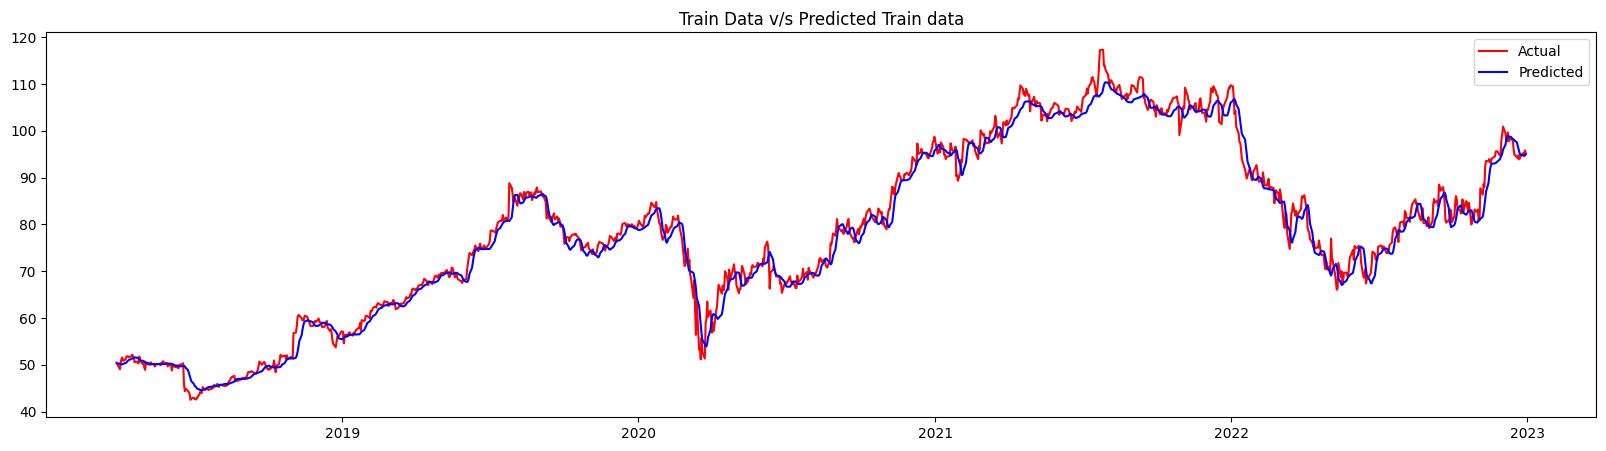

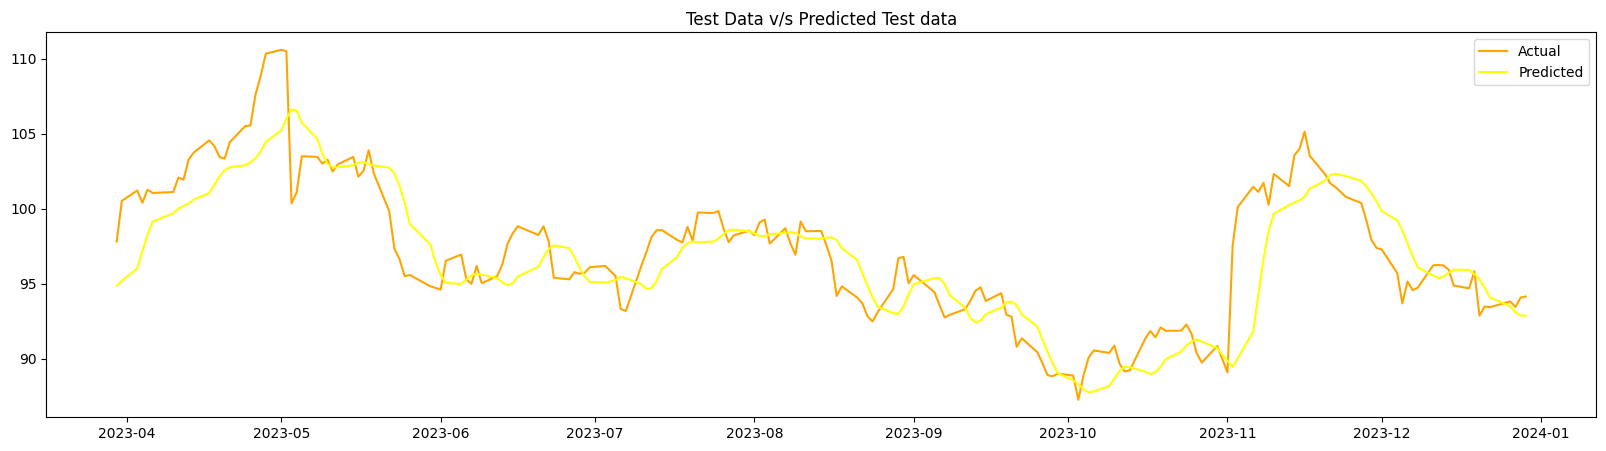

In [228]:
#LSTM
evaluate_models(lstm_model, "LSTM(Long Short Term Memory)", X_train_data, Y_train_data, X_test_data, Y_test_data)

###GRU

In [91]:
gru_model = Sequential()
gru_model.add(GRU(units = 50, return_sequences = True, input_shape = (X_train_data.shape[1], 1)))
gru_model.add(GRU(units = 50, return_sequences = True))
gru_model.add(GRU(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [92]:
gru_model.compile(loss = "mean_squared_error", optimizer = "adam")

In [93]:
gru_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                          │ (None, 60, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, 60, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 1)                   │             159 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,409 (91.44 KB)

 Trainable params: 23,409 (91.44 KB)

 Non-trainable params: 0 (0.00 B)

In [186]:
gru_model.fit(X_train_data, Y_train_data, validation_data = (X_test_data, Y_test_data), epochs = 60, batch_size = 50, verbose = 1)

Epoch 1/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 5.7179e-04 - val_loss: 5.3047e-04
Epoch 2/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 5.0345e-04 - val_loss: 5.3001e-04
Epoch 3/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 5.3122e-04 - val_loss: 5.2523e-04
Epoch 4/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 5.0922e-04 - val_loss: 5.1242e-04
Epoch 5/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 4.7303e-04 - val_loss: 5.1589e-04
Epoch 6/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 5.1449e-04 - val_loss: 5.2376e-04
Epoch 7/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 4.9201e-04 - val_loss: 5.1084e-04
Epoch 8/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 4.7172e-04 - val_loss: 4.9099e-04
Epoch 9/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 5.2329e-04 - val_loss: 5.0528e-04
Epoch 10/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 4.6776e-04 - val_loss: 5.0005e-04
Epoch 11/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss

========================= GRU(Gated Recurrent Unit) =========================
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(1199, 1) (1199,) (1199, 60, 1)
(190, 1) (190,) (190, 60, 1)
Mean Absolute Errors is :
 		 trained data:  1.196686029633052 
 		 test data:  1.191939544677735
--------------------------------------------------
Root Mean squared Error is :
 		 trained data:  1.6535077835422975 
 		 test data:  1.6719818963550432
--------------------------------------------------
R-Squared score is :
 		 trained data:  0.9917581668022144 
 		 test data:  0.8649766012831314


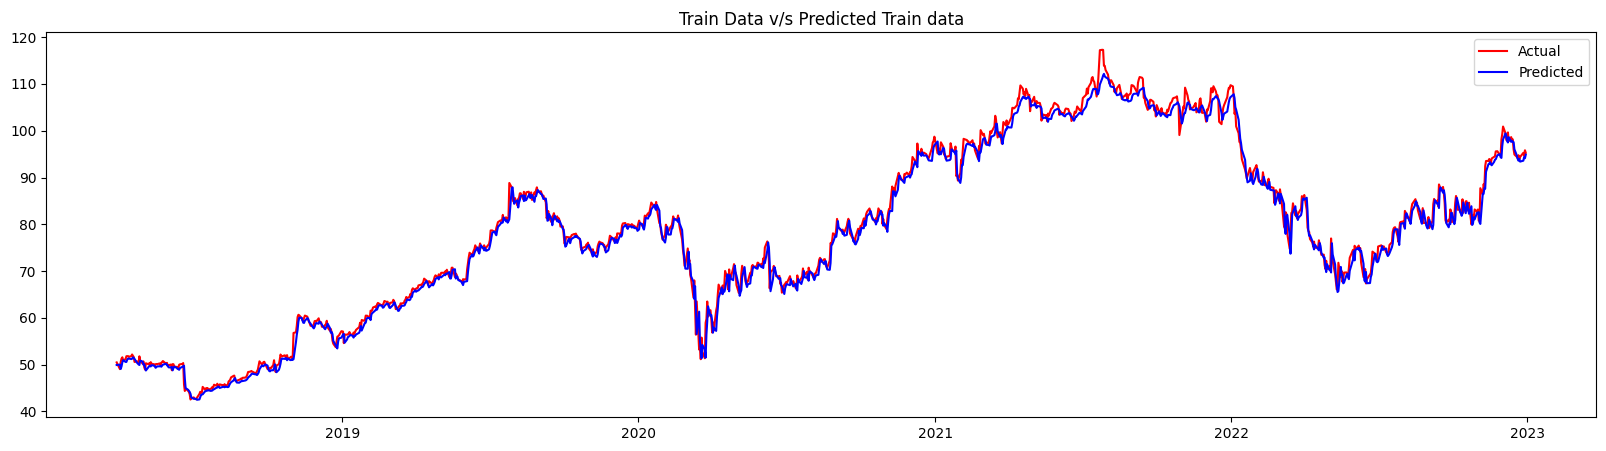

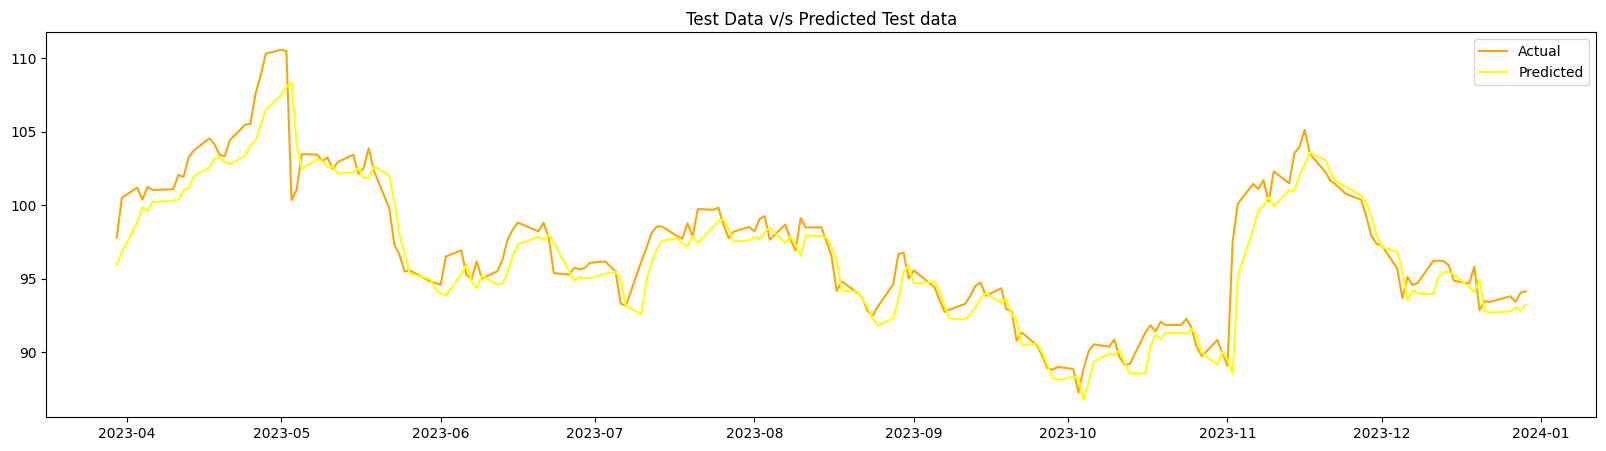

In [206]:
evaluate_models(gru_model, "GRU(Gated Recurrent Unit)", X_train_data, Y_train_data, X_test_data, Y_test_data)

###Hybrid Model(LSTM + Dense Layer)

In [139]:
X_train_data.shape

(1199, 60, 1)

In [140]:
hybrid_model = Sequential()
hybrid_model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_data.shape[1], 1)))
hybrid_model.add(LSTM(units = 50, return_sequences = True))
hybrid_model.add(LSTM(units = 50, return_sequences = True))

hybrid_model.add(Dense(units=25, activation='relu'))
hybrid_model.add(Dense(units=10, activation='relu'))
hybrid_model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [141]:
hybrid_model.compile(loss = "mean_squared_error", optimizer = "adam")

In [142]:
hybrid_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 60, 25)              │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 60, 10)              │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 60, 1)               │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,346 (204.48 KB)

 Trainable params: 52,346 (204.48 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
hybrid_model.fit(X_train_data, Y_train_data, validation_data = (X_test_data, Y_test_data), epochs = 60, batch_size = 50, verbose = 1)

Epoch 1/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0639 - val_loss: 0.0681
Epoch 2/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0612 - val_loss: 0.0627
Epoch 3/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - loss: 0.0608 - val_loss: 0.0648
Epoch 4/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0621 - val_loss: 0.0624
Epoch 5/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0611 - val_loss: 0.0578
Epoch 6/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0623 - val_loss: 0.0617
Epoch 7/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0619 - val_loss: 0.0633
Epoch 8/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - loss: 0.0599 - val_loss: 0.0627
Epoch 9/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0596 - val_loss: 0.0637
Epoch 10/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0640 - val_loss: 0.0619
Epoch 11/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0635 - val_loss: 0.0638
Epoch 12/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss:

In [144]:
print(X_train_data.shape, X_test_data.shape, Y_train_data.shape, Y_test_data.shape)

(1199, 60, 1) (190, 60, 1) (1199,) (190,)


========================= Hybrid Model =========================
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(1199,) (1199,) (1199, 60, 1)
(190,) (190,) (190, 60, 1)
Mean Absolute Errors is :
 		 trained data:  14.771082823230785 
 		 test data:  17.39172359265779
--------------------------------------------------
Root Mean squared Error is :
 		 trained data:  18.10755462946913 
 		 test data:  18.002316220139118
--------------------------------------------------
R-Squared score is :
 		 trained data:  -3710.432152313728 
 		 test data:  -92706.60744563352


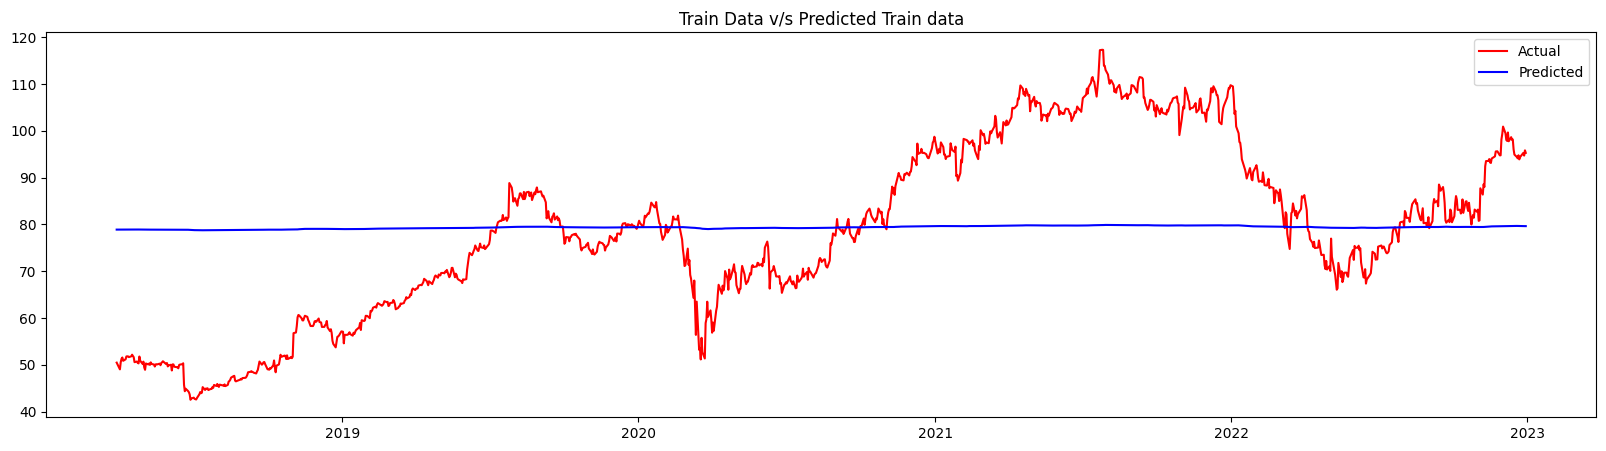

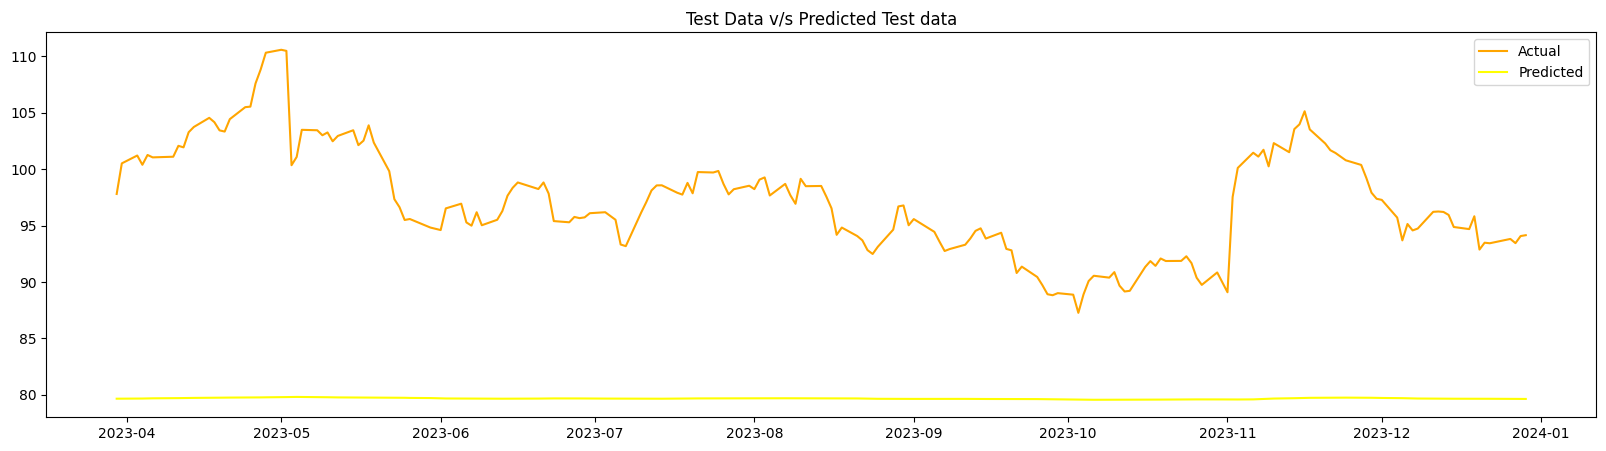

In [203]:
evaluate_models(hybrid_model, "Hybrid Model", X_train_data, Y_train_data, X_test_data, Y_test_data)

###Attention Model

##Forecasting

In [207]:
for mdl in eval.keys():
  print("-"*25,mdl,"-"*25)
  df = pd.DataFrame(eval[mdl])
  print(df)

------------------------- LSTM(Long Short Term Memory) -------------------------
            Mean Absolute Error  Root Mean Squared Error  R-Squared Score
train data             1.634637                 2.219648         0.984831
test data              1.718159                 2.299869         0.744497
------------------------- Hybrid Model -------------------------
            Mean Absolute Error  Root Mean Squared Error  R-Squared Score
train data            14.771083                18.107555     -3710.432152
test data             17.391724                18.002316    -92706.607446
------------------------- GRU(Gated Recurrent Unit) -------------------------
            Mean Absolute Error  Root Mean Squared Error  R-Squared Score
train data             1.196686                 1.653508         0.991758
test data              1.191940                 1.671982         0.864977


In [147]:
forecast_dates

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=248, freq=None)

In [208]:
Y_forecast_prev_data = Y_test_data[-no_of_days_to_analyse:]
Y_forecast_prev_data.shape

(60,)

In [215]:
def forecast_dataset(model, name, data, column_size, forecast_dates):
  y = []
  data = data.reshape(1, data.shape[0], 1)
  # print(model, data, column_size, forecast_dates)
  for i in range(len(forecast_dates)):
    new_value = model.predict(data[:, i:i + column_size, :])
    data = np.append(data, new_value.reshape(1, 1, new_value.shape[1]), axis=1)
    new_value = scaler.inverse_transform(new_value)
    y.append(new_value)
  return np.array(y)


def forecast(model, name, Y_forecast_data):
  Y_forecast_data.reshape(Y_forecast_data.shape[0])
  date_filtered = data[data.index >= '2024-01-01']

  plt.figure(figsize = (18,5))
  plt.plot(forecast_dates, Y_forecast_data.reshape(Y_forecast_data.shape[0], 1), color = "orange", label = "Actual")
  plt.plot(date_filtered.index, date_filtered["Close"], color = "yellow", label = "Predicted")
  plt.title(f"Actual Data v/s Predicted Test data for {name}")
  plt.legend()
  plt.show()
  print()


In [217]:
Y_lstm_forecast_data = forecast_dataset(lstm_model, "LSTM", Y_forecast_prev_data, no_of_days_to_analyse, forecast_dates)

Y_gru_forecast_data = forecast_dataset(gru_model, "GRU", Y_forecast_prev_data, no_of_days_to_analyse, forecast_dates)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

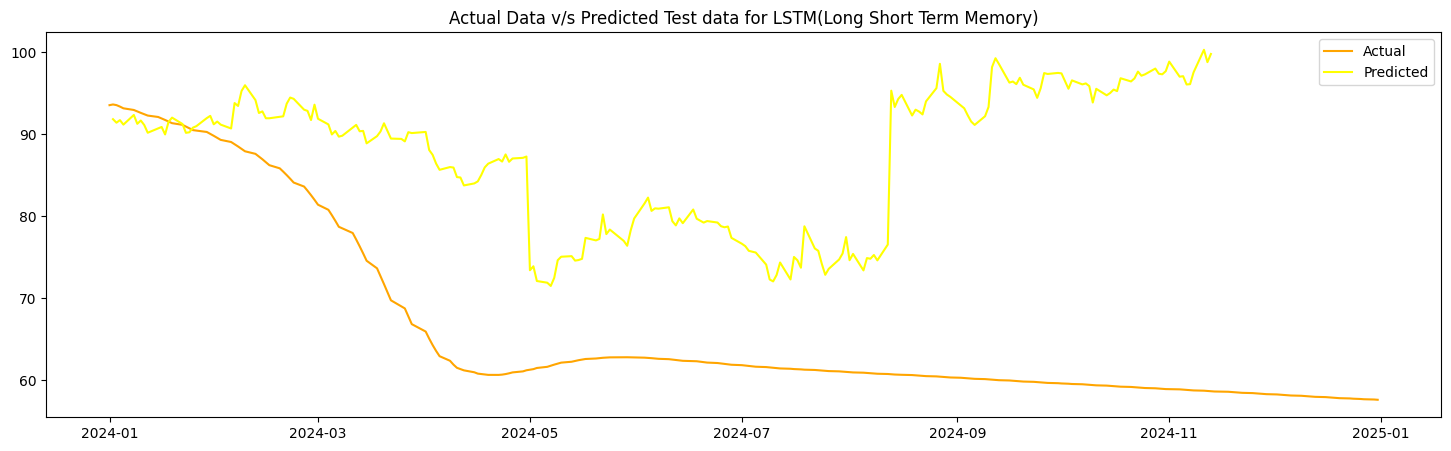

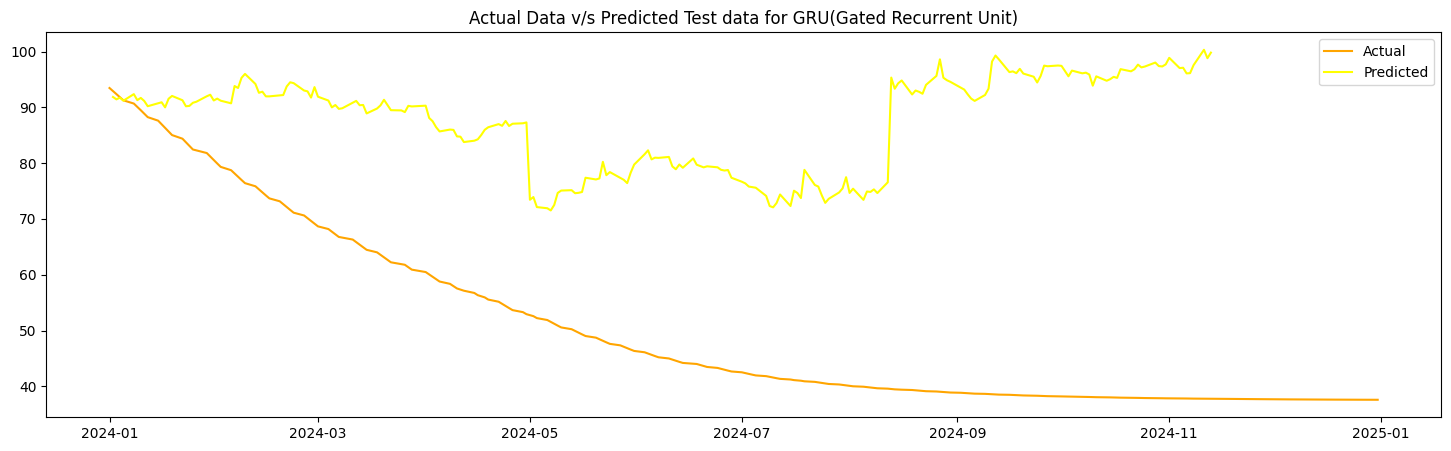

In [219]:
forecast(lstm_model, "LSTM(Long Short Term Memory)", Y_lstm_forecast_data)

forecast(gru_model, "GRU(Gated Recurrent Unit)", Y_gru_forecast_data)

# forecast(hybrid_model, "GRU(Gated Recurrent Unit)", Y_hybrid_forecast_data)